Kyle Mckay - F21DL Coursework Portfolio
===

1. [Data Set Choice](#h1)
2. [Visualization and Initial Data Exploration](#h2)
    1. [Direct Comparison](#h2_1)
    2. [Conversion to Pixel Data](#h2_2)
    3. [Average Images](#h2_3)
    4. [Standard Deviation](#h2_4)
3. [Acknowledgement](#ack)

# Setup

Import the necessary modules used throughout the notebook

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

Initalise variables and functions used throughout the notebook

In [46]:
img_dir = 'DATA/images'

all_imgs = os.listdir(img_dir)

# get the list of jpegs per class (differentiated by initial letters in filename)
normal_imgs = [fn for fn in all_imgs if fn.startswith('NP')]
pollen_imgs = [fn for fn in all_imgs if fn.startswith('P')]


# Utility method to plot numpy greyscale pixel matrices side by side for comparison
def multi_plot(*imgs):
    fig = plt.figure()

    # TODO add multiple rows if many images
    for i, avg in enumerate(imgs, 1):
        title, dat = avg
        ax = fig.add_subplot(1, len(imgs), i)
        ax.imshow(dat, vmin=0, vmax=255, cmap='Greys_r')
        plt.title(title)
        plt.axis('off')
    
    plt.show()

# Functional approach to collapsing 3rd order numpy greyscale pixel tensors using certain methods (e.g. mean)
def collapse_img(full_mat, fn = np.mean, size = (300, 180)):
    # Apply desired function
    collapsed_img = fn(full_mat, axis = 0)
    
    # Reshap back to a matrix
    return collapsed_img.reshape(size)

# <a id="h1">Data Set Choice</a>

I chose to work with the Honey Bee Pollen Data set (2018, Rodriguez et al.) because:

- It is an image dataset and I'm interested in computer vision and image processing techniques.
- I'm interested in ML applications in areas of conservation and ecoology, so the data subject is appealing.
- The data looks to already be well formed as all images are homogeneous at 180 x 300 pixels - so any preprocessing is minimised and simplified. Resizing is not necessary, although destructive resizing is still an option that may be desirable to reduce the number of features.
- The data set is suited to a binary classification problem which is more approachable than the many more complex data sets intended for multi-label classification.
- The set of instances (image files) is managable with only 714 - clearly labelled into two classes (pollen carrying and non-pollen carrying bees).
- The images are full colour which I'm interested to work with, but also leaves freedom to reduce the number of features by converting to greyscale and it could be interesting to see what kind of effect on results that has.
- The data set is clearly licensed and there is a clear data provenance.

TODO: Consider possibility of introducing third class (no bee present) to add some complexity.

# <a id="h2">Visualization and Initial Data Exploration</a>

Quickly checking the distribution of classes in the data reveals there are **369** pollen carrying bees and **345** non-pollen carry bees which means the data is fairly well balanced though not perfect. I could simply cut out a random sample of the pollen carrying class to create an equal class distribution.

This was simply checked in the shell via:
```bash
ls ./DATA/images/ | grep -c '^P'
ls ./DATA/images/ | grep -c '^NP'
```


## <a id="h2_1">Direct Comparison</a>

The following code pulls 3 random sample images from each class for an initial direct visual comparison.

It's clear from a quick visual inspection that the pollen carrying bees have distinct features (the pollen) on either side of their abdomen which isn't present in the other images. This suggests to me it should be fine to process the images in greyscale and reduce the number of features for efficiency since they should still be distinguishable.

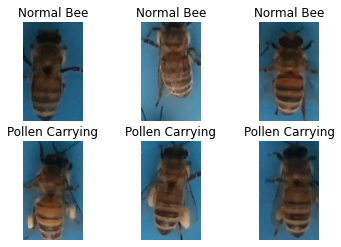

In [41]:
# randomly select 3 of each
select_norm = np.random.choice(normal_imgs, 3, replace = False)
select_poll = np.random.choice(pollen_imgs, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure()
for i in range(6):
    if i < 3:
        fp = f'{img_dir}/{select_norm[i]}'
        label = 'Normal Bee'
    else:
        fp = f'{img_dir}/{select_poll[i-3]}'
        label = 'Pollen Carrying'
    ax = fig.add_subplot(2, 3, i+1)
    
    fn = image.load_img(fp)
    plt.imshow(fn,)
    plt.title(label)
    plt.axis('off')
plt.show()

## <a id="h2_2">Conversion to Pixel Data</a>

The following script is converting greyscale versions of the image files into a 3rd order tensor with $n\times m$ elements. $n$ is the number of observations and $m$ is the number of pixels (features). The element values represent the pixel shade.

In [42]:
def img2np(path, list_of_filename, size = (300, 180)):
    # iterating through each file
    for fn in list_of_filename:
        fp = f'{path}/{fn}'
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(img_dir, normal_imgs)
pollen_images = img2np(img_dir, pollen_imgs)

## <a id="h2_3">Average Images</a>

By averaging the pixel data for all of a given class, I can get a sense for the regions which are common to each class. It's not as clear as before, but there's still an obvious presence on either side of the abdomen for the pollen carrying class which isn't present in the other images.

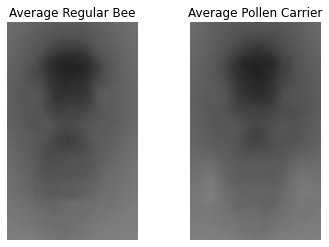

In [43]:
normal_mean = collapse_img(normal_images, fn=np.mean)
pollen_mean = collapse_img(pollen_images, fn=np.mean)

multi_plot(
    ('Average Regular Bee', normal_mean),
    ('Average Pollen Carrier', pollen_mean),
)

### Average Images Difference

The difference between the classes becomes clearer by taking the difference of these two averaged images. Now it's much more obvious that one class (pollen carrier) has a distinct region of pixels in the lower left and a less distinct region in the lower right.

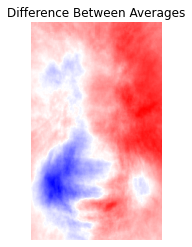

In [44]:
plt.imshow(normal_mean - pollen_mean, cmap='bwr')
plt.title('Difference Between Averages')
plt.axis('off')
plt.show()

## <a id="h2_4">Standard Deviation</a>

To get a sense of the pixel regions which vary the most in each class, the same reasoning of averaging can be applied, but instead taking the standard deviation. The resulting images aren't as clear, but here I can see a lot more varience in those lower left and right regions for the pollen carrying class. This reinforces my understanding of the data.

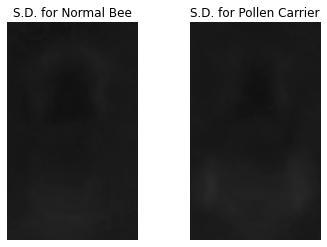

In [45]:
normal_sd = collapse_img(normal_images, np.std)
pollen_sd = collapse_img(pollen_images, np.std)

multi_plot(
    ('S.D. for Normal Bee', normal_sd),
    ('S.D. for Pollen Carrier', pollen_sd),
)

# <a id="ack">Acknowledgement</a>

Honey Bee Pollen Data from:

Ivan Rodriguez, Rémi Mégret, Edgar Acuña, José Agosto, Tugrul Giray. Recognition of pollen-bearing bees from Video using Convolutional Neural Network, IEEE Winter Conf. on Applications of Computer Vision, 2018, Lake Tahoe, NV. [https://doi.org/10.1109/WACV.2018.00041](https://doi.org/10.1109/WACV.2018.00041)

Image Data Exploration Code adapted from: [https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2)